C:\Users\janan\AppData\Local\Temp\ipykernel_16696\2410055035.py:17: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_coupon_qty = pd.read_sql(query, conn)


Total Quantity Sold by Coupon Status:
  Coupon_Status  Total_Qty
0      Not Used     7713.0
1          Used     7481.0


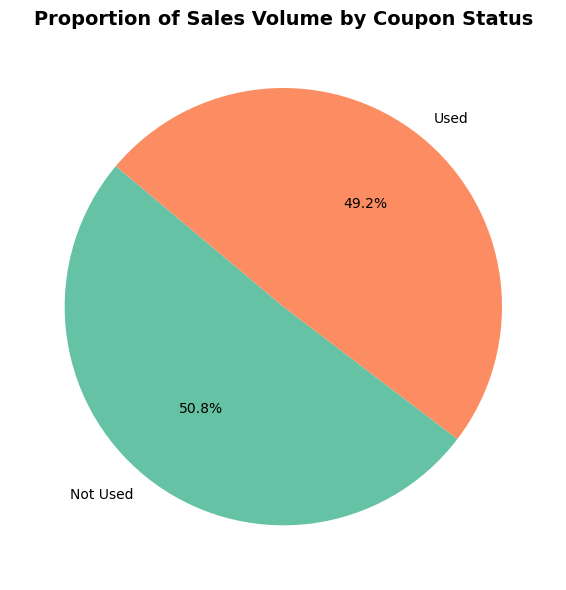

In [1]:
#1.Do discounted products lead to higher sales volume?
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ---  Connect to MySQL Database ---
conn = mysql.connector.connect(
    host='localhost',        
    user='root',              
    password='Janani@1997',
    database='DB'   
)

# ---  Call Stored Procedure ---
query = "CALL GetTotalQuantityByCouponStatus();"
df_coupon_qty = pd.read_sql(query, conn)

# ---  Display the Results ---
print("Total Quantity Sold by Coupon Status:")
print(df_coupon_qty)

# ---  Visualization 2: Pie Chart (Proportion of Quantity Sold) ---
plt.figure(figsize=(6,6))
plt.pie(df_coupon_qty['Total_Qty'], 
        labels=df_coupon_qty['Coupon_Status'], 
        autopct='%1.1f%%', 
        startangle=140, 
        colors=sns.color_palette("Set2"))
plt.title("Proportion of Sales Volume by Coupon Status", fontsize=14, weight='bold')
plt.tight_layout()
plt.show()

# ---  Close the Connection ---
conn.close()


Coupon Status Frequency:
  Coupon_Status  frequency
0      Not Used       2520
1          Used       2480


C:\Users\janan\AppData\Local\Temp\ipykernel_2016\3376829461.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_coupon_freq = pd.read_sql(query, conn)


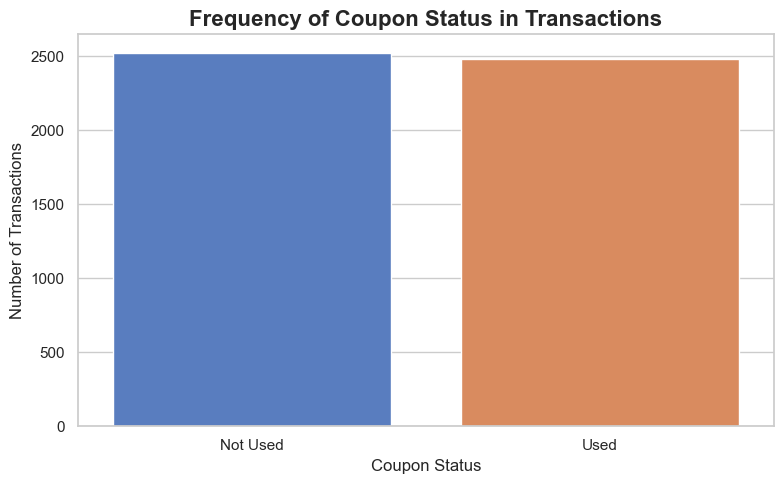

In [3]:
#2.Which coupon codes were most frequently used?

# ---  Connect to MySQL Database ---
conn = mysql.connector.connect(
    host='localhost',        
    user='root',              
    password='Janani@1997', 
    database='DB'   
)

# ---  Call Stored Procedure ---
query = "CALL GetCouponStatusFrequency();"
df_coupon_freq = pd.read_sql(query, conn)

# ---  Display the Results ---
print("Coupon Status Frequency:")
print(df_coupon_freq)

# ---  Visualization 1: Bar Chart (Coupon Status Frequency) ---
sns.set(style="whitegrid", palette="muted")

plt.figure(figsize=(8,5))
sns.barplot(data=df_coupon_freq, 
            x='Coupon_Status', 
            y='frequency', 
            hue='Coupon_Status', 
            dodge=False)

plt.title("Frequency of Coupon Status in Transactions", fontsize=16, weight='bold')
plt.xlabel("Coupon Status", fontsize=12)
plt.ylabel("Number of Transactions", fontsize=12)
plt.legend([],[], frameon=False)
plt.tight_layout()
plt.show()

# ---  Close the Connection ---
conn.close()


C:\Users\janan\AppData\Local\Temp\ipykernel_2016\743494220.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_discount = pd.read_sql(query, conn)


Revenue vs Discount Percentage:
   Revenue  Discount_pct
0   204.92           5.0
1  1744.44          10.0
2  1405.74          15.0
3  2851.36          10.0
4  1980.29          20.0


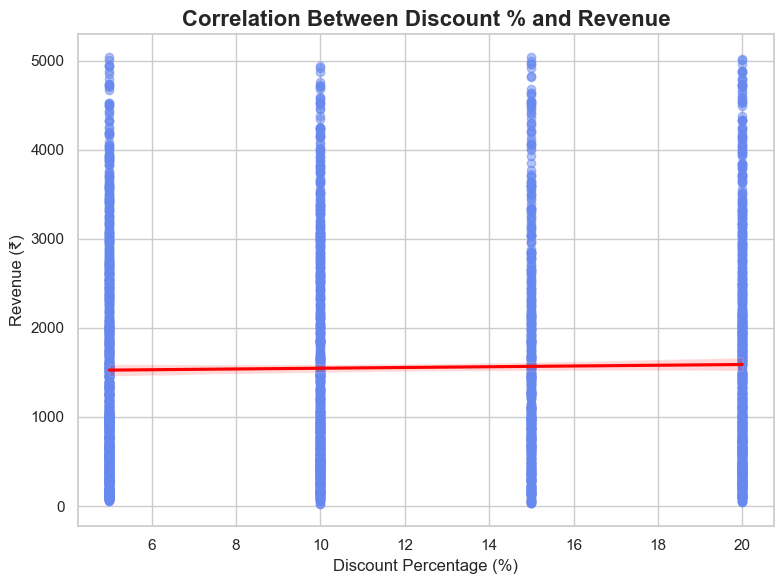

In [5]:
#3.Is there a correlation between discount percentage and revenue?

# ---  Connect to MySQL Database ---
conn = mysql.connector.connect(
    host='localhost',         
    user='root',              
    password='Janani@1997', 
    database='DB'   
)

# ---  Call Stored Procedure ---
query = "CALL ExportDiscountData();"
df_discount = pd.read_sql(query, conn)

# ---  Display the Results ---
print("Revenue vs Discount Percentage:")
print(df_discount.head())

# ---  Visualization 2: Regression Line (Trend between Discount and Revenue) ---
plt.figure(figsize=(8,6))
sns.regplot(data=df_discount, x='Discount_pct', y='Revenue', scatter_kws={'alpha':0.5}, line_kws={"color": "red"})
plt.title("Correlation Between Discount % and Revenue", fontsize=16, weight='bold')
plt.xlabel("Discount Percentage (%)", fontsize=12)
plt.ylabel("Revenue (₹)", fontsize=12)
plt.tight_layout()
plt.show()

# ---  Close Connection ---
conn.close()


Revenue by Coupon Status:
  Coupon_Status     Revenue
0      Not Used  3903277.93
1          Used  3779405.63


C:\Users\janan\AppData\Local\Temp\ipykernel_2016\2922476599.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_revenue_coupon = pd.read_sql(query, conn)


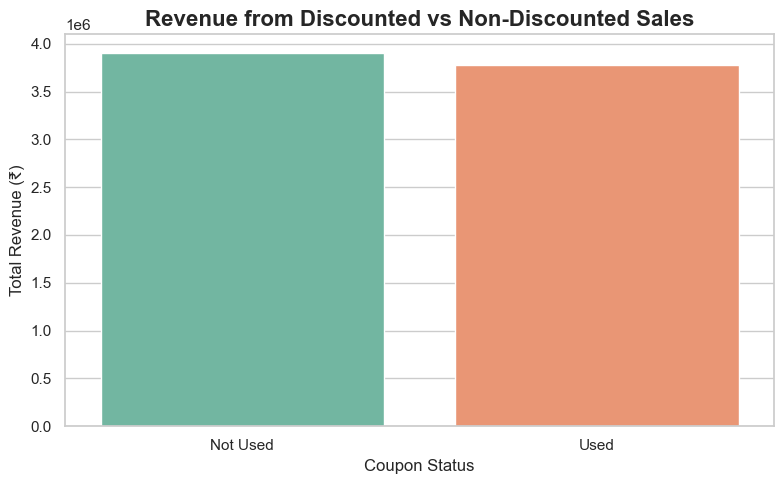

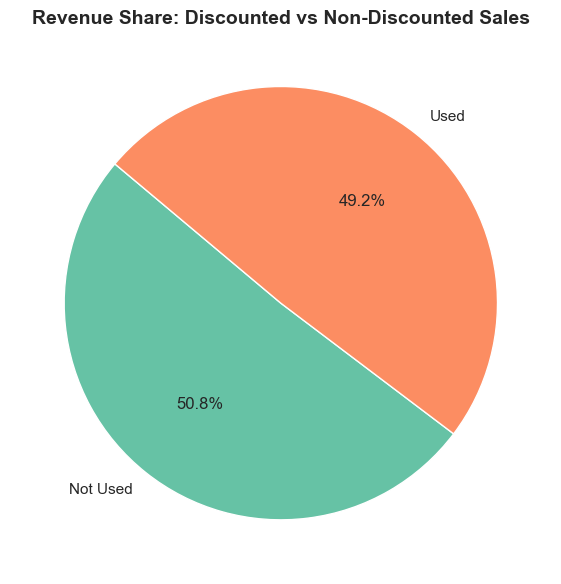

In [6]:
# 4.How much revenue comes from discounted vs non-discounted sales?

# ---  Connect to MySQL Database ---
conn = mysql.connector.connect(
    host='localhost',         
    user='root',              
    password='Janani@1997', 
    database='DB'   
)

# ---  Call Stored Procedure ---
query = "CALL GetRevenueByCouponStatus();"
df_revenue_coupon = pd.read_sql(query, conn)

# ---  Display the Results ---
print("Revenue by Coupon Status:")
print(df_revenue_coupon)

# ---  Visualization 1: Bar Chart (Discounted vs Non-Discounted Revenue) ---
sns.set(style="whitegrid", palette="Set2")

plt.figure(figsize=(8,5))
sns.barplot(data=df_revenue_coupon, 
            x='Coupon_Status', 
            y='Revenue', 
            hue='Coupon_Status', 
            dodge=False)

plt.title("Revenue from Discounted vs Non-Discounted Sales", fontsize=16, weight='bold')
plt.xlabel("Coupon Status", fontsize=12)
plt.ylabel("Total Revenue (₹)", fontsize=12)
plt.legend([],[], frameon=False)
plt.tight_layout()
plt.show()

# ---  Visualization 2: Pie Chart (Revenue Share) ---
plt.figure(figsize=(6,6))
plt.pie(df_revenue_coupon['Revenue'], 
        labels=df_revenue_coupon['Coupon_Status'], 
        autopct='%1.1f%%', 
        startangle=140,
        colors=sns.color_palette("Set2", len(df_revenue_coupon)))
plt.title("Revenue Share: Discounted vs Non-Discounted Sales", fontsize=14, weight='bold')
plt.tight_layout()
plt.show()

# ---  Close Connection ---
conn.close()


C:\Users\janan\AppData\Local\Temp\ipykernel_2016\2596351862.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_coupon_month = pd.read_sql(query, conn)
C:\Users\janan\AppData\Local\Temp\ipykernel_2016\2596351862.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_coupon_month, x='Month', y='CouponUsed', palette='coolwarm')


Monthly Coupon Engagement (Used Coupons):
        Month  CouponUsed
0     January         247
1   September         226
2       March         224
3    December         217
4        July         214
5    November         207
6        June         201
7     October         198
8    February         196
9       April         194
10     August         183
11        May         173


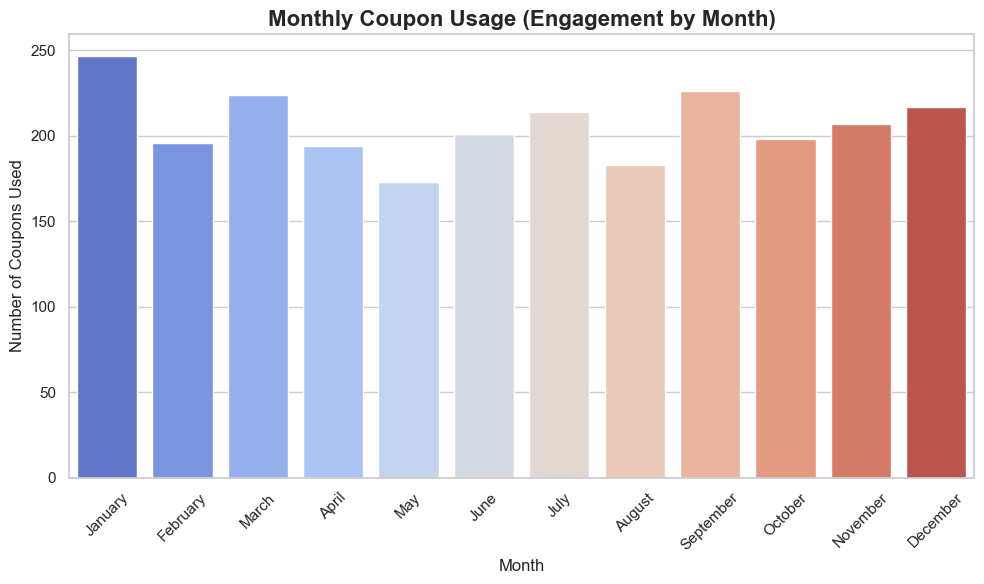

In [8]:
# 5.During which months do coupons drive the most engagement?

# ---  Connect to MySQL Database ---
conn = mysql.connector.connect(
    host='localhost',        
    user='root',              
    password='Janani@1997', 
    database='DB'   
)

# ---  Call Stored Procedure ---
query = "CALL GetCouponUsageByMonth();"
df_coupon_month = pd.read_sql(query, conn)

# ---  Display the Results ---
print("Monthly Coupon Engagement (Used Coupons):")
print(df_coupon_month)

# ---  Ensure Proper Month Order (chronological) ---
month_order = ["January","February","March","April","May","June",
               "July","August","September","October","November","December"]
df_coupon_month['Month'] = pd.Categorical(df_coupon_month['Month'], categories=month_order, ordered=True)
df_coupon_month = df_coupon_month.sort_values('Month')

# ---  Visualization 1: Bar Chart (Monthly Coupon Usage) ---
sns.set(style="whitegrid", palette="coolwarm")

plt.figure(figsize=(10,6))
sns.barplot(data=df_coupon_month, x='Month', y='CouponUsed', palette='coolwarm')
plt.title("Monthly Coupon Usage (Engagement by Month)", fontsize=16, weight='bold')
plt.xlabel("Month", fontsize=12)
plt.ylabel("Number of Coupons Used", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# --- Close Connection ---
conn.close()
